In [28]:
from sympy.abc import s, t
from sympy.integrals.transforms import inverse_laplace_transform

from cardioLPN import A_R, A_L, A_C
from sympy import symbols
from sympy import *

import matplotlib.pyplot as plt
import numpy as np

In [27]:
R_p, R_d, R, L, C = symbols('R_p, R_d R L C', positive=True)
U_2, I_2 = symbols('U_2 I_2', positive=True)
U, I = symbols('U I', positive=True)

t = symbols('t', positive=True, real = True)
#s = symbols('s', positive=True)

A_result = A_C(C) * A_L(L) * A_R(R)


# defining a function for U_2 and I_2
U_2 = 1/(s*(1+s*5))
I_2 = 1/(s*(1+s*15))

# defining
x_2 = Matrix([U_2, I_2])

x_1 = A_result * x_2

#
U_1 = x_1[0]
I_1 = x_1[1]

u_1 = inverse_laplace_transform(x_1[0], s, t)


In [29]:
A_result = A_C(2) * A_L(3) * A_R(2)


# defining a function for U_2 and I_2
U_2 = 1/(s*(1+s*5))
I_2 = 1/(s*(1+s*15))

# defining
x_2 = Matrix([U_2, I_2])

x_1 = A_result * x_2

#
U_1 = x_1[0]
I_1 = x_1[1]


# inverse laplace transform
# output
u_1 = inverse_laplace_transform(x_1[0], s, t)

# inputs
u_2 = inverse_laplace_transform(U_2, s, t)
i_2 = inverse_laplace_transform(I_2, s, t)

In [30]:
x_1[0]
#(3*s + 2)/(s*(15*s + 1)) + (2*s*(3*s + 2) + 1)/(s*(5*s + 1))

(3*s + 2)/(s*(15*s + 1)) + 1/(s*(5*s + 1))

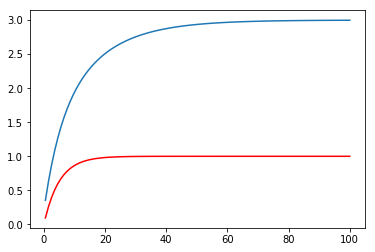

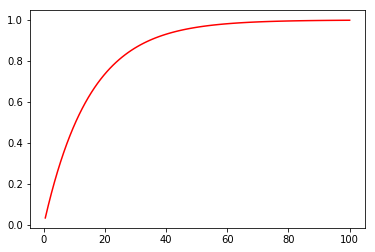

In [5]:
u_1_func = lambdify(t, u_1)
time = np.linspace(0.5, 100, 100)

u_1_array = [u_1_func(t_) for t_ in time]
#u_1_func(time)
#u_1_array
plt.plot(time, u_1_array)


# Input u_2
u_2_func = lambdify(t, u_2)
time = np.linspace(0.5, 100, 100)

u_2_array = [u_2_func(t_) for t_ in time]

plt.plot(time, u_2_array, 'r')
plt.show()


# Input i_2
i_2_func = lambdify(t, i_2)
time = np.linspace(0.5, 100, 100)

i_2_array = [i_2_func(t_) for t_ in time]

plt.plot(time, i_2_array, 'r')
plt.show()

In [31]:
## New configuration


A_result_2 = A_L(3) * A_R(2) * A_C(2)

x_1 = A_result_2 * x_2

U_1 = x_1[0]
I_1 = x_1[1]





In [7]:
# inverse laplace transform
# output
u_1_vary = inverse_laplace_transform(simplify(x_1[0]), s, t)




In [32]:
x_1[0]

(3*s + 2)/(s*(15*s + 1)) + (2*s*(3*s + 2) + 1)/(s*(5*s + 1))

In [10]:
u_1_vary_func = lambdify(t, u_1_vary)


u_1_vary_array = [u_1_vary_func(t_) for t_ in time]
#u_1_func(time)
#u_1_array
plt.plot(time, u_1_vary_array)
plt.show()

NameError: name 'InverseLaplaceTransform' is not defined

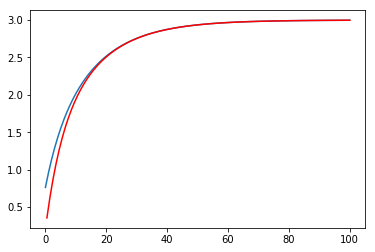

In [23]:
import mpmath as mp
import numpy as np

def f(s):
    return 1 / (s-1)


x_1_func = lambdify(s, x_1[0])
def u_1(s):
    return x_1_func(s)

t = np.linspace(0.01, 100,100)

G = []

for i in t:
    G.append(mp.invertlaplace(test_function, i, method = 'dehoog', dps = 10, degree = 18))


plt.plot(t, G)
plt.plot(time, u_1_array, 'r')
plt.show()